In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/zequnl/.local/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/zequnl/.local/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


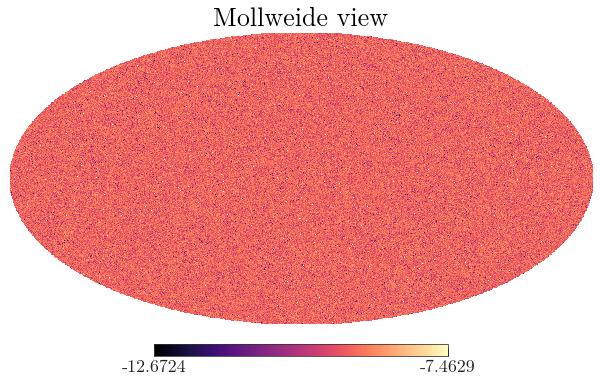

In [2]:
m = hp.read_map('/tigress/zequnl/xgpaint/cib100.fits')
hp.mollview( np.log10(m) )

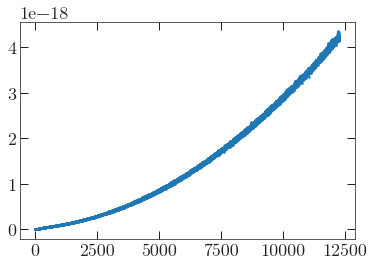

In [3]:
ps = hp.anafast(m, iter=0)
clxg = ps[2:]
ell = np.arange(2,len(ps))
plt.plot(ell, clxg * ell**2)

In [4]:
# import so_pysm_models as spm
# import pysm
# from astropy.io import fits
# import scipy

# mapfreq = 100.0
# nside = 4096
# cib = spm.WebSkyCIB(nside=nside)

# sky = pysm.Sky({})
# sky.add_component(cib)

# mwebsky = sky.get_emission(mapfreq * u.GHz)
# ps_websky = hp.anafast(mwebsky[0].value, iter=0)

# ell = np.arange(2,len(ps_websky))
# clw = ps_websky[2:]

In [5]:
ell, clw = np.genfromtxt('websky_ref.txt', unpack=True)

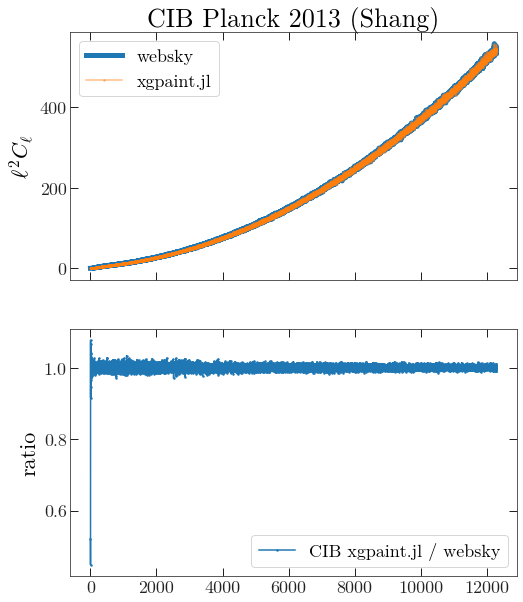

In [6]:
fig, ax = plt.subplots(2,1,figsize=(8,10), sharex=True)
ax[0].set_title('CIB Planck 2013 (Shang)')
ax[0].plot(ell, clw * ell**2, lw=5, label="websky")
ax[0].plot(ell, clxg * ell**2 / 0.78e-20, alpha=0.5, label="xgpaint.jl")
ax[0].set_ylabel('$\ell^2 C_{\ell}$')
ax[0].legend()

ax[1].plot(ell, clxg / clw / 0.78e-20, label='CIB xgpaint.jl / websky')
ax[1].set_ylabel('ratio')
ax[1].legend()